In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv("flight_data_cleaned.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


# Visualize dep_delay for each airport

In [16]:
df.origin.value_counts()

EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64

In [48]:
#df.pivot(columns="origin", values="dep_delay")

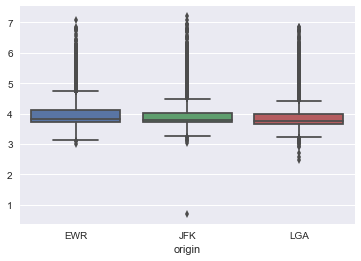

In [47]:
sns.boxplot(data=np.log(df.pivot(columns="origin", values="dep_delay") + 45) )

In [42]:
df.pivot(columns="origin", values="dep_delay").describe()

origin,EWR,JFK,LGA
count,120835.000000,111279.000000,104662.000000
mean,15.221308,12.177244,10.429979
std,40.789520,38.722719,39.414590
min,-25.000000,-43.000000,-33.000000
25%,-4.000000,-4.000000,-6.000000
50%,0.000000,-1.000000,-3.000000
75%,17.000000,11.000000,8.000000
max,1126.000000,1301.000000,911.000000


Dep_delay from each of the airports looks almost similar. Need to find the difference statistically (Later).

Find month wise dep_delay for airports.

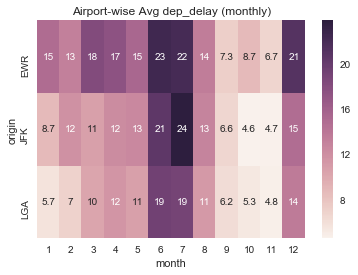

In [15]:
avg_dep_delays = df.pivot_table(index="origin", columns="month", values="dep_delay")
sns.heatmap( avg_dep_delays, annot=True )
plt.title("Airport-wise Avg dep_delay (monthly)");

From heatmap it's very clear that LGA is having, on an average, lighter shade. 
That means LGA shows lesser dep_delay. <br>
Hence LGA is marginally the best airport in terms of timely departure.

<b><font color=red>What's the reason for better performance (marginally) of LGA? </font></b>



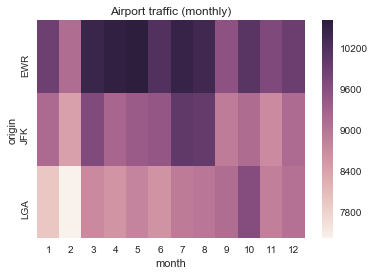

In [14]:
# No. of flights departing various month
count_flight_launches = df.pivot_table(index="origin", columns="month", values="dep_delay", aggfunc=np.size)
sns.heatmap( count_flight_launches )
plt.title("Airport traffic (monthly)");
# So LGA is having least load

Observation
1. EWR is most busy airport throughout the year.
2. JFK sees seasonal traffic
3. LGA traffic is lowest <br>

<b>How airport traffic impacts dep_delays </b>

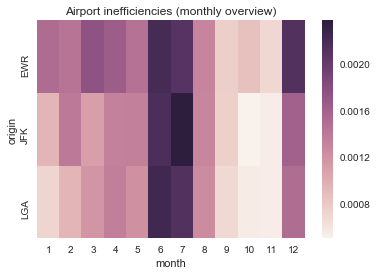

In [18]:
sns.heatmap( avg_dep_delays / count_flight_launches );
plt.title("Airport inefficiencies (monthly overview)");

Below points are obvious from above charting:
1. LGA is marginally efficient and has managed the dep_delay better than the rest (for every unit of traffic)
2. Seasonal challenge (in June, July & Dec) has impacted all airports adversely.<br>
Following may be probable explanations:
    - Systemic issue: 
        - Seasonal impact on input, i.e. Labour unavailability etc.
        - Insufficient capacity clogging airports during high traffic
    - Airport specific issue: (need further analysis)


<b>Seasons fueling inefficiency</b>

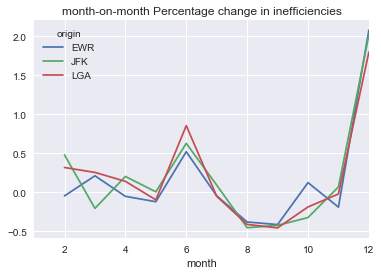

In [39]:
mom_pct_change = ( avg_dep_delays / count_flight_launches).pct_change(axis=1)
mom_pct_change.T.plot();
plt.title("month-on-month Percentage change in inefficiencies");

<font color=green>So seasonal impact on inefficiencies is same across all airports, which is indicative of Systemic issue.</font>